# Imports and set up

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sequene_preprocessing import categorize_sequences, add_sequence_features, validate_sequences, convert_sequences, draw_sampled_smiles
from vizualize_sequence_validity import plot_sequence_validity, plot_invalid_categories

GLOBAL_INPUT_DATA_DIR = '/home/dreamtim/Coding/ITMO/itmo-cpp/input_data'
OUTPUT_DATA_DIR = '/home/dreamtim/Coding/ITMO/itmo-cpp/output_data'

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data loading

In [29]:
peptides_df = pd.read_csv(os.path.join(GLOBAL_INPUT_DATA_DIR, 'all_peptides_for_classification.csv'), index_col=0)
peptides_df.head()

,id,sequence,extra_name,cpp_category,is_cpp,cpp_type,origin,id_uptake,peptide,uptake_type,...,raw_time,method,cell_line,cargo,mechanism,raw_temperature,id_article,doi,pubmed_id,title
0,2721,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,True,NaN,NaN,938.0,2721.0,Fluorescence intensity,...,1h,Fluorescent Microscopy,HSC-T6,FITC,NaN,37ºC,NaN,NaN,NaN,NaN
3,2724,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,True,NaN,NaN,969.0,2724.0,Fluorescence intensity,...,1h,Fluorescent Microscopy,HeLa cells,FITC,NaN,NaN,NaN,NaN,NaN,NaN
7,2761,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,True,NaN,NaN,1113.0,2761.0,Fluorescence,...,4h,Fluorescent Microscopy,ARPE-19 cells,Cx43AsODN),NaN,37ºC,NaN,NaN,NaN,NaN
8,2762,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,True,NaN,NaN,1114.0,2762.0,Fluorescence,...,4h,Fluorescent Microscopy,ARPE-19 cells,Cx43AsODN),NaN,37ºC,NaN,NaN,NaN,NaN
9,2630,?A-RR-[KRRRRRE],NaN,NaN,True,NaN,NaN,720.0,2630.0,Relative Mean Fluorescence intensity (%),...,NaN,Flow cytometry,HeLa cells,FITC,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
assert peptides_df.sequence.nunique() == len(peptides_df)
assert 'Unnamed: 0' not in peptides_df.columns

# Prepoessing

### Convert to standard sequence and categorical features

In [31]:
final_peptides_df = (peptides_df.copy()
    .pipe(categorize_sequences)
    .pipe(add_sequence_features)
    .pipe(validate_sequences)
)

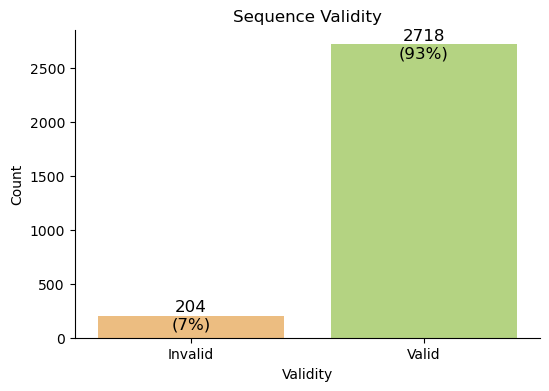

In [32]:
plot_sequence_validity(final_peptides_df)
plt.show()

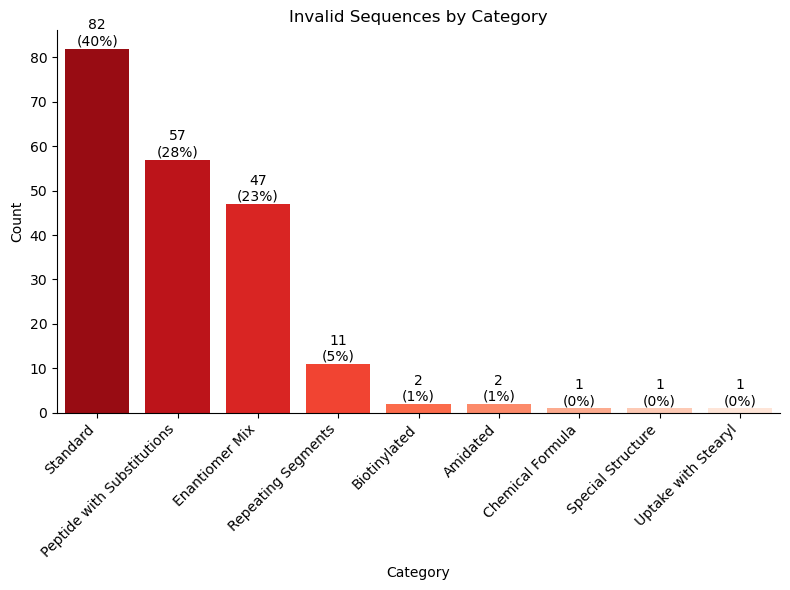

In [33]:
plot_invalid_categories(final_peptides_df)
plt.show()

In [34]:
peptides_df.columns

Index(['id', 'sequence', 'extra_name', 'cpp_category', 'is_cpp', 'cpp_type',
       'origin', 'id_uptake', 'peptide', 'uptake_type', 'raw_efficiency',
       'raw_toxicity', 'raw_concentration', 'id_experiment',
       'peptide_experiment', 'raw_time', 'method', 'cell_line', 'cargo',
       'mechanism', 'raw_temperature', 'id_article', 'doi', 'pubmed_id',
       'title'],
      dtype='object')

In [35]:
final_peptides_df.columns

Index(['id', 'sequence', 'extra_name', 'cpp_category', 'is_cpp', 'cpp_type',
       'origin', 'id_uptake', 'peptide', 'uptake_type', 'raw_efficiency',
       'raw_toxicity', 'raw_concentration', 'id_experiment',
       'peptide_experiment', 'raw_time', 'method', 'cell_line', 'cargo',
       'mechanism', 'raw_temperature', 'id_article', 'doi', 'pubmed_id',
       'title', 'sequence_category', 'standard_sequence', 'nh3_tail',
       'po3_pos', 'biotinylated', 'acylated_n_terminal', 'cyclic', 'amidated',
       'stearyl_uptake', 'hexahistidine_tagged', 'modifications'],
      dtype='object')

In [36]:
print('New columns:')
for col in set(final_peptides_df.columns) - set(peptides_df.columns):
    print(col)

New columns:
po3_pos
standard_sequence
sequence_category
hexahistidine_tagged
biotinylated
stearyl_uptake
nh3_tail
cyclic
acylated_n_terminal
amidated
modifications


In [37]:
final_peptides_df.to_csv(os.path.join(OUTPUT_DATA_DIR, 'all_peptides_standartized_seq.csv'))

OSError: Cannot save file into a non-existent directory: 'output'

### Parse to SMILES

In [ ]:
with_smiles_df = convert_sequences(final_peptides_df.copy())

In [ ]:
plot_sequence_validity(with_smiles_df, sequence_col='smiles_sequence', title='SMILES sequence validity')
plt.show()

In [ ]:
draw_sampled_smiles(with_smiles_df)

In [ ]:
with_smiles_df.to_csv(os.path.join(OUTPUT_DATA_DIR, 'all_peptides_with_smiles.csv'))